In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [2]:
banknote=pd.read_csv('bank note.csv',names=['variance of Wavelet','skewness of Wavelet',' curtosis of Wavelet','entropy of image','class'])
banknote

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy of image,class
0,3.621600,8.66610,-2.807300,-0.446990,0
1,4.545900,8.16740,-2.458600,-1.462100,0
2,3.866000,-2.63830,1.924200,0.106450,0
3,3.456600,9.52280,-4.011200,-3.594400,0
4,0.329240,-4.45520,4.571800,-0.988800,0
5,4.368400,9.67180,-3.960600,-3.162500,0
6,3.591200,3.01290,0.728880,0.564210,0
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,0
9,1.535600,9.17720,-2.271800,-0.735350,0


# Data Exploration

In [5]:
banknote.shape

(1372, 5)

In [6]:
banknote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance of Wavelet     1372 non-null float64
skewness of Wavelet     1372 non-null float64
 curtosis of Wavelet    1372 non-null float64
entropy of image        1372 non-null float64
class                   1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.6 KB


In [7]:
banknote.isnull().sum()

variance of Wavelet     0
skewness of Wavelet     0
 curtosis of Wavelet    0
entropy of image        0
class                   0
dtype: int64

In [8]:
banknote.columns

Index(['variance of Wavelet', 'skewness of Wavelet', ' curtosis of Wavelet',
       'entropy of image', 'class'],
      dtype='object')

In [9]:
banknote['class'].unique()

array([0, 1], dtype=int64)

In [10]:
banknote.corr()

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy of image,class
variance of Wavelet,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness of Wavelet,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis of Wavelet,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy of image,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [11]:
banknote.describe()

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy of image,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# Data Visualization

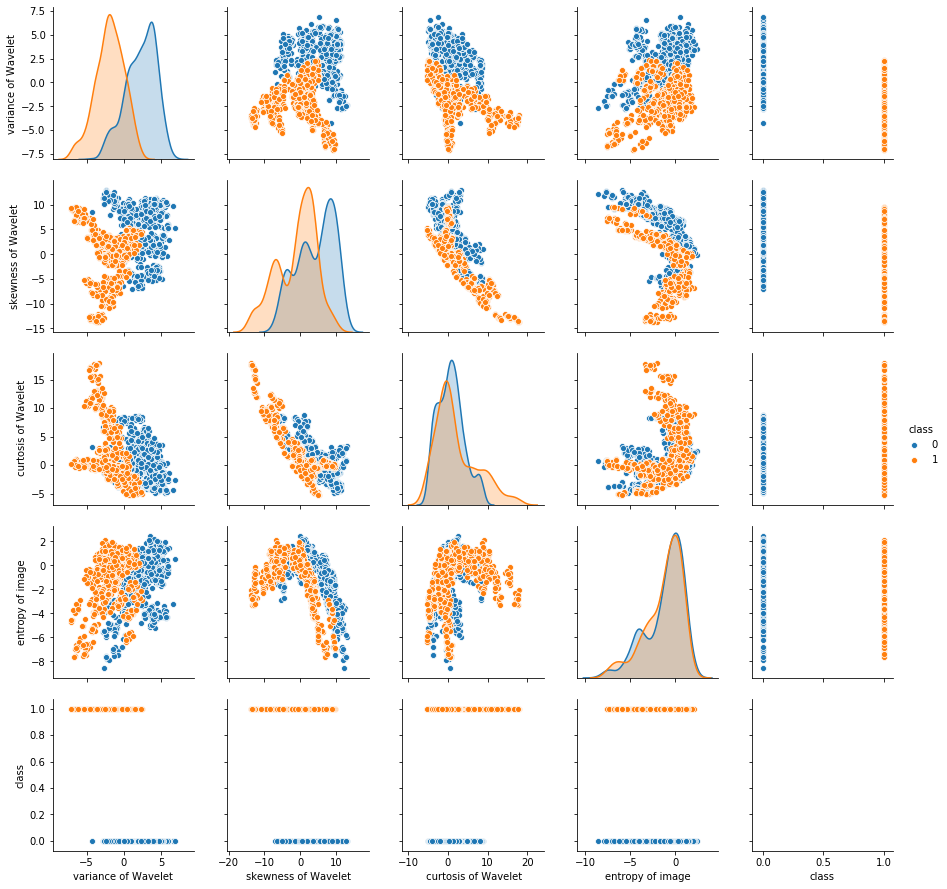

In [12]:
#bivariate analysis
sns.pairplot(banknote,hue='class')

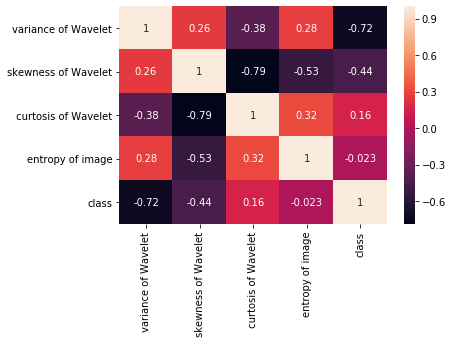

In [13]:
#correlation heatmap
sns.heatmap(banknote.corr(),annot=True)
plt.show()

In [14]:
#counting target variables
from collections import Counter
Counter(banknote['class'])

Counter({0: 762, 1: 610})

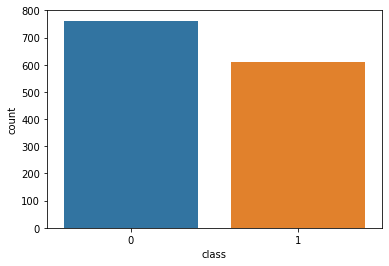

In [15]:
#plotting target variables
sns.countplot(x='class',data=banknote)

In [16]:
banknote.columns

Index(['variance of Wavelet', 'skewness of Wavelet', ' curtosis of Wavelet',
       'entropy of image', 'class'],
      dtype='object')

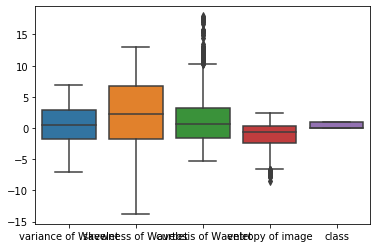

In [17]:
sns.boxplot(data=banknote)

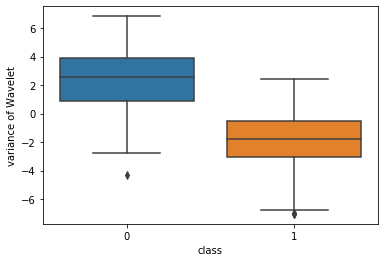

In [18]:
#univariate analysis
sns.boxplot('class','variance of Wavelet',data=banknote)

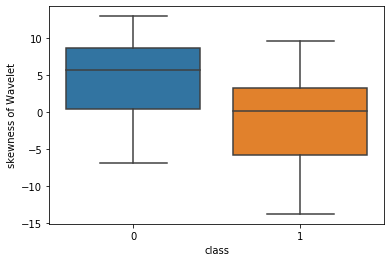

In [19]:
sns.boxplot('class','skewness of Wavelet',data=banknote)

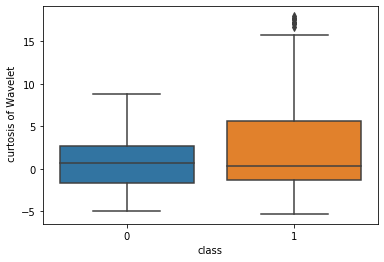

In [20]:
sns.boxplot('class',' curtosis of Wavelet',data=banknote)

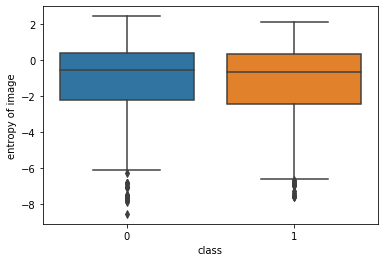

In [21]:
sns.boxplot('class','entropy of image',data=banknote)

In [3]:
#outlier treatment
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(banknote))
z

array([[1.12180565, 1.14945512, 0.97597007, 0.35456135, 0.89472059],
       [1.44706568, 1.06445293, 0.89503626, 0.12876744, 0.89472059],
       [1.20780971, 0.77735215, 0.12221838, 0.61807317, 0.89472059],
       ...,
       [1.47235682, 2.62164576, 3.75901744, 0.75488418, 1.11766736],
       [1.40669251, 1.75647104, 2.552043  , 0.04315848, 1.11766736],
       [1.04712236, 0.43982168, 0.29861555, 1.1364645 , 1.11766736]])

In [4]:
threshold=3
print(np.where(z>3))
df=banknote[(z<3).all(axis=1)]
df

(array([  45,   47,  194,  202,  291,  394,  465,  529,  562,  581,  740,
        765,  820,  826,  881,  887,  942,  948,  974, 1003, 1009, 1064,
       1070, 1125, 1131, 1142, 1186, 1192, 1203, 1218, 1247, 1253, 1264,
       1308, 1314, 1369], dtype=int32), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2], dtype=int32))


,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy of image,class
0,3.621600,8.666100,-2.807300,-0.446990,0
1,4.545900,8.167400,-2.458600,-1.462100,0
2,3.866000,-2.638300,1.924200,0.106450,0
3,3.456600,9.522800,-4.011200,-3.594400,0
4,0.329240,-4.455200,4.571800,-0.988800,0
5,4.368400,9.671800,-3.960600,-3.162500,0
6,3.591200,3.012900,0.728880,0.564210,0
7,2.092200,-6.810000,8.463600,-0.602160,0
8,3.203200,5.758800,-0.753450,-0.612510,0
9,1.535600,9.177200,-2.271800,-0.735350,0


In [5]:
banknote.shape

(1372, 5)

In [6]:
df.shape

(1336, 5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0E5C2310>,
      dtype=object)

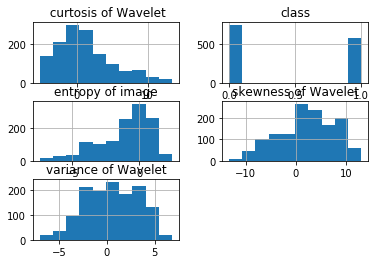

In [26]:
df.hist()

In [27]:
from scipy.stats import skew
skew(df)

array([-0.16483827, -0.29772351,  0.78719001, -0.93401806,  0.25044374])

In [7]:
x=df.drop('class',axis=1)

In [8]:
y=df['class']

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [10]:
print(x.shape)
print(y.shape)

(1336, 4)
(1336,)


In [11]:
#splitting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size = 0.22,random_state=42)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1042, 4)
(294, 4)
(1042,)
(294,)


In [13]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

97.61904761904762
[[164   7]
 [  0 123]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       171
           1       0.95      1.00      0.97       123

    accuracy                           0.98       294
   macro avg       0.97      0.98      0.98       294
weighted avg       0.98      0.98      0.98       294



In [14]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb)*100)
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

86.39455782312925
[[153  18]
 [ 22 101]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       171
           1       0.85      0.82      0.83       123

    accuracy                           0.86       294
   macro avg       0.86      0.86      0.86       294
weighted avg       0.86      0.86      0.86       294



In [15]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

97.27891156462584
[[168   3]
 [  5 118]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       171
           1       0.98      0.96      0.97       123

    accuracy                           0.97       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.97      0.97      0.97       294



In [16]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

99.65986394557824
[[170   1]
 [  0 123]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       171
           1       0.99      1.00      1.00       123

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [17]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[168   3]
 [  4 119]]
97.61904761904762


In [18]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [19]:
svmkernel('linear')

0.9829931972789115
[[166   5]
 [  0 123]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       171
           1       0.96      1.00      0.98       123

    accuracy                           0.98       294
   macro avg       0.98      0.99      0.98       294
weighted avg       0.98      0.98      0.98       294



In [20]:
svmkernel('poly')

0.9863945578231292
[[167   4]
 [  0 123]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       171
           1       0.97      1.00      0.98       123

    accuracy                           0.99       294
   macro avg       0.98      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294



# Comparision Table

Here we can see KNN is the best fit model for the evaluation

In [21]:
#roc-curve
from sklearn.metrics import roc_curve
y_pred_prob=knn.predict_proba(x_test)[:,1]
y_pred_prob

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0.

In [22]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [23]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.00584795 1.        ]
[0. 1. 1.]
[2. 1. 0.]


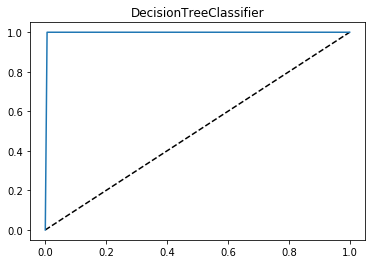

In [24]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="KNeighborsClassifier")
plt.title("DecisionTreeClassifier")
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

0.97953216374269


In [48]:
from sklearn.externals import joblib

In [49]:
#saving the model as pickl
joblib.dump(knn,"Project 17_banknote.pkl")

['Project 17_banknote.pkl']

In [50]:
#loading the model
knn_from_joblib=joblib.load('Project 17_banknote.pkl')

In [51]:
#using the model to make prediction
knn_from_joblib.predict(x_test)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)